### Overview

TwoDotSeven is a revolutionary credit decisioning platform that is changing the way companies manage their working capital. We combine the power of technology and analytics with financing. Our objective is to leverage our strengths in machine learning and predictive analysis to provide you granular visibility into your working capital and leverage your receivables for getting access to capital.

### Business Objectives

This analysis can help the business minimize credit card default risk, increase revenue from interest and fees, and identify profitable customers for targeted marketing.

### Problem Statement

By analyzing the factors that influence the setting of a card limit, the bank can benefit in several ways. The analysis can provide valuable insights into customer segments and their creditworthiness, allowing the bank to make informed decisions when determining credit limits. This can help minimize the risk of default by setting appropriate credit limits for different customers based on their income, credit rating, and other relevant factors. Additionally, the analysis can identify potential high-value customers who may be eligible for higher credit limits, enabling the bank to tailor marketing strategies to attract and retain profitable customers. Ultimately, this data-driven approach can lead to improved risk management, targeted marketing efforts, and increased profitability for the bank.

### Dataset
It has 2 files in .csv format. The columns of files are as follows:

Customer Details:

    Name- name of the customer
    CustomerID- Unique ID of a customer
    Age - The age of the individual
    Marital Status- Status of the customer( Married/Unmarried/Widow/Separated/Divorced)
    Gender - Gender of the individual 
    Ethnicity - Ethnicity of the individual
    Education - Education level


Card Details:

    CustomerID- Unique ID of a customer 
    Income - Income of the individual (Lakhs)
    Limit  - Current credit card limit 
    Rating - Credit rating of the individual
    Cards - Number of cards the individual has
    Balance - Current account balance of the individual (Thousands)

# Import Python Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import two data set 
### 1. Customer Details as cust and 
### 2. Card Details as card

In [3]:
cust = pd.read_csv("C:\Technology\\HeroVired\\Capston\\Customer Details.csv", encoding='ISO-8859-1')

card = pd.read_csv(r"C:\Technology\\HeroVired\\Capston\\Card Details.csv", encoding='ISO-8859-1')


### Joining two datasets as data. Since both the datasets have distinct columns except CustomerID
### Here Concat funtion keys are not used since, both the datasets have same order and number of CustomerIDs

In [4]:
data = pd.concat([cust,card[['Income','Limit','Rating','Cards','Balance']]], axis=1)
data

,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education,Income,Limit,Rating,Cards,Balance
0,Katherine Bettcher,0002-ORFBO,30,Married,Male,Caucasian,Master,105.038,9142,734,3,232
1,Alejandro Graham,0002-ORFBOA,71,Married,Male,Asian,Bachelor,69.820,4223,389,1,924
2,Priscilla Ian,0002-ORFBOC,46,Seperated,Male,African American,Senior Secondary,17.441,2430,253,1,20
3,Ovella,0002-ORFBOCH,42,Married,Female,Caucasian,Senior Secondary,39.368,3829,248,3,813
4,Juliann,0002-ORFBOH,30,Married,Male,African American,Doctorate,56.375,2850,258,1,109
...,...,...,...,...,...,...,...,...,...,...,...,...
32542,Oletta,9992-UJOELH,34,Unmarried,Male,Caucasian,Bachelor,32.930,4222,308,4,162
32543,Leesa Hugo,9993-LHIEB,61,Married,Female,Caucasian,Senior High School,12.469,5645,311,2,487
32544,Oliva,9993-LHIEBH,64,Unmarried,Male,Caucasian,Senior Secondary,64.167,3116,285,3,576
32545,Hank Hunter,9995-HOTOH,77,Unmarried,Female,Caucasian,Bachelor,20.970,1356,161,2,0


### There is no missing value in dataset

In [5]:
data.isna().sum()

Name              0
CustomerID        0
Age               0
Marital Status    0
Gender            0
Ethnicity         0
Education         0
Income            0
Limit             0
Rating            0
Cards             0
Balance           0
dtype: int64

### No duplicate values

In [6]:
data[data.duplicated()]

,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education,Income,Limit,Rating,Cards,Balance


### dataset data type
#### There are 6 categorical data and 6 numerical data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32547 entries, 0 to 32546
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            32547 non-null  object 
 1   CustomerID      32547 non-null  object 
 2   Age             32547 non-null  int64  
 3   Marital Status  32547 non-null  object 
 4   Gender          32547 non-null  object 
 5   Ethnicity       32547 non-null  object 
 6   Education       32547 non-null  object 
 7   Income          32547 non-null  float64
 8   Limit           32547 non-null  int64  
 9   Rating          32547 non-null  int64  
 10  Cards           32547 non-null  int64  
 11  Balance         32547 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 3.0+ MB


### Statistic summary of numerical data

In [8]:
round(data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Age,32547.0,55.48,16.99,25.00,42.00,55.00,69.00,86.00
Income,32547.0,46.49,37.14,10.63,20.66,33.47,58.08,160.23
Limit,32547.0,4419.52,2202.44,1134.00,2727.00,4178.00,5636.00,11200.00
Rating,32547.0,326.72,136.15,119.00,224.00,316.00,405.00,805.00
Cards,32547.0,2.91,1.33,1.00,2.00,3.00,4.00,7.00
Balance,32547.0,447.89,454.21,0.00,5.00,331.00,749.00,1597.00


 From the statistics summary, we can infer the below findings :
<br> 1. Card holders age is between 25 - 86 years.
<br> 2. Spread out of data in Income, Limit and Rating seems to be high.
<br> 3. Number of Card holders has mostly 2-4 cards.
<br> 4. Balance of cards are mostly at lower end. 

### Statistic summary of categorical data

In [9]:
data.describe(include='object').T

,count,unique,top,freq
Name,32547,24942,Claude,9
CustomerID,32547,32547,0002-ORFBO,1
Marital Status,32547,5,Unmarried,16829
Gender,32547,2,Female,16562
Ethnicity,32547,3,Caucasian,16380
Education,32547,8,Master,8781


 From the statistics summary, we can infer the below findings :
<br> 1. Similar card holder names are existing where Claude appears 9 times.
<br> 2. Dataset data is unique as each card holder has unique Customer ID.
<br> 3. Most of the customer are Unmarried, Female and from Caucasian.
<br> 4. Most of the customer are highly educated holding Master degree.

### Unique value in dataset

In [10]:
data.nunique()

Name              24942
CustomerID        32547
Age                  62
Marital Status        5
Gender                2
Ethnicity             3
Education             8
Income            24384
Limit              7443
Rating              679
Cards                 7
Balance            1570
dtype: int64

From the above data only "Age, Income, Limit, Rating, Balance" are quantitative continuous variables
<br> whereas "Cards, " is quantitative Discrete variables
<br> From above data CustomerID is removed from mode as there will be no repetative values and all values are unique
<br> From the data above "Marital Status, Gender, Ethnicity" are qualitative Nominal data
<br> where as "Education" is qualitative Ordinal data
<br> Above observation is done using data description given and finding value_count of the variables

## The measures of central tendency for all the variables

In [11]:
#Continuous variables
continuous = ['Age','Income','Limit','Rating','Balance']

#Discrete variables
discrete = ['Cards']

#Nominal Variables
nominal = ['Marital Status', 'Gender', 'Ethnicity']

#Ordinal Variables
ordinal = ['Education']

#The measures of central tendency for all the quantitative variables which are continuous
meancv = round(data[['Age','Income','Limit','Rating','Balance']].mean(),2)
mediancv = round(data[['Cards']].median(),2)
modedv = round(data[['Marital Status', 'Gender', 'Ethnicity','Education']].mode().T,2)

print('*'*50)
print(f'Mean of the below varibles:\n {meancv}')
print('*'*50)
print(f'Median of the below variables:\n{mediancv}')
print('*'*50)
print(f'Mode of below variables:\n{modedv}')
print('*'*50)

**************************************************
Mean of the below varibles:
 Age          55.48
Income       46.49
Limit      4419.52
Rating      326.72
Balance     447.89
dtype: float64
**************************************************
Median of the below variables:
Cards    3.0
dtype: float64
**************************************************
Mode of below variables:
                        0
Marital Status  Unmarried
Gender             Female
Ethnicity       Caucasian
Education          Master
**************************************************


# Outliers in dataset

In [85]:
# Quartile 1 of all the numerical variables

Q1=round(data[['Age','Income','Limit','Rating','Balance','Cards']].quantile(.25),2)
Q1

Age          42.00
Income       20.66
Limit      2727.00
Rating      224.00
Balance       5.00
Cards         2.00
Name: 0.25, dtype: float64

In [86]:
# Quartile 3 of all the numerical variables

Q3=round(data[['Age','Income','Limit','Rating','Balance','Cards']].quantile(.75),2)
Q3

Age          69.00
Income       58.08
Limit      5636.00
Rating      405.00
Balance     749.00
Cards         4.00
Name: 0.75, dtype: float64

In [87]:
# Inter Quartile Range for all variables

IQR = Q3 - Q1
IQR

Age          27.00
Income       37.42
Limit      2909.00
Rating      181.00
Balance     744.00
Cards         2.00
dtype: float64

In [88]:
# Lower limit for all variables

lower_limit=Q1-1.5*IQR
lower_limit

Age           1.50
Income      -35.47
Limit     -1636.50
Rating      -47.50
Balance   -1111.00
Cards        -1.00
dtype: float64

In [89]:
# Upper limit for all variables

upper_limit=Q3+1.5*IQR
upper_limit

Age         109.50
Income      114.21
Limit      9999.50
Rating      676.50
Balance    1865.00
Cards         7.00
dtype: float64

In [62]:
# Outlier above upper limit for appropriate variables

Upper_Outlier=data.max() - upper_limit
Upper_Outlier

Age                  -23.5
Balance             -268.0
Cards                  0.0
CustomerID             NaN
Education              NaN
Ethnicity              NaN
Gender                 NaN
Income            46.03575
Limit               1200.5
Marital Status         NaN
Name                   NaN
Rating               128.5
dtype: object

In [150]:
# In this outlier result only positive value to be considered as it is above upper limit.

Upper_Outlier_Result=data[['Age','Income','Limit','Rating','Balance','Cards']].max()-upper_limit
Upper_Outlier_Result

Age         -23.500
Income       46.021
Limit      1200.500
Rating      128.500
Balance    -268.000
Cards         0.000
dtype: float64

In [97]:
num_var = data.select_dtypes(include = "number").columns
num_var

Index(['Age', 'Income', 'Limit', 'Rating', 'Cards', 'Balance'], dtype='object')

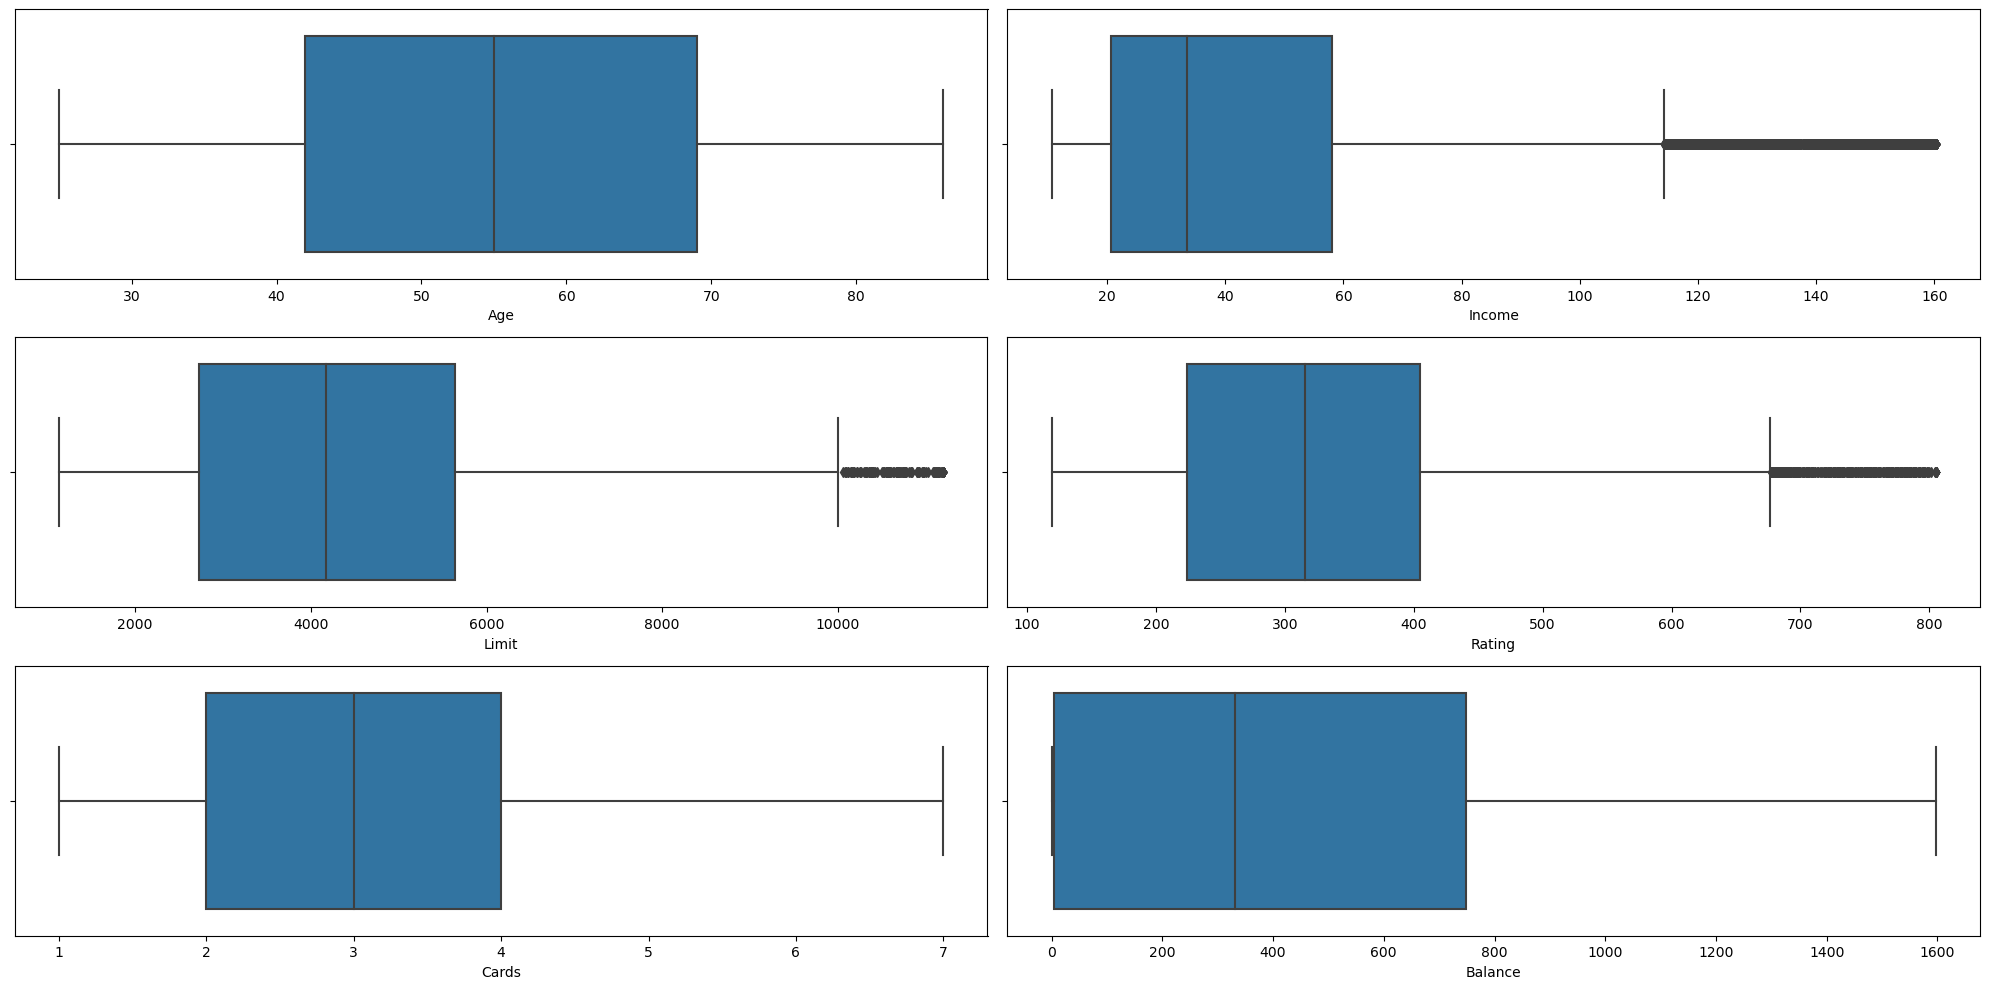

In [145]:
# Box plot is suitable for showcasing outlier. Here we have one variables for showcasing outlier in Employee Attrition Modelling dataset

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize=(20,10))
ax = ax.flatten()

for i, col in enumerate(num_var):
    sns.boxplot(data=data, x= col, ax=ax[i])
    
plt.tight_layout()

 Number of Cards, Age and Balance have no outliers
<br> Income, Limit and Rating have outliers
<br> 

In [27]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

### Number of outlier in Income

In [41]:
outliers = find_outliers_IQR(data['Income'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 3036
max outlier value: 160.231
min outlier value: 114.232


Income outliers are almost 9% of total data and should be consider for EDA. There are individual with higher income.

### Number of outlier in Limit

In [42]:
outliers = find_outliers_IQR(data['Limit'])
print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 895
max outlier value: 11200
min outlier value: 10063


Limit outliers are 2.7% of dataset and not too much far from upper limit, should be consider for EDA.

### Number of outlier in Rating

In [43]:
outliers = find_outliers_IQR(data['Rating'])
print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 571
max outlier value: 805
min outlier value: 677


Rating outliers are 1.8% of dataset and are above upper limit. Higher rating is not unusual and should be consider for EDA.

Hence, the dataset is clean and fine for analysis.